# Practical Machine Learning 
### Project: Model Selection

In [ ]:
# need these two installed to be able to deploy using Azure ML studio
!pip install azureml-core
!pip install azureml-dataprep

# Abstract

*When doing a loan application, a large amount of information is usually required. In this notebook I will explore a dataset of loan Applications and find the most variables that impact the loan acceptance, to then train a model to see if I can correctly predict the loan status.*

# Part 1: Business and Data Understanding

### Q. Define the problem domain

*The dataset contains information on applicants for loans along with whether the loan was approved or not.*

### Q. Identify candidate questions for your machine learning project

*The main objective here is to predict whether a loan will be approved or not.*

### Q. Identify a suitable dataset for your canditate question(s)

In [ ]:
# This is to connect the notebook with Azure ML studio
from azureml.core import Workspace, Dataset

subscription_id = 'eeb99a43-3099-4f1a-a6eb-08cdbd0647ae'
resource_group = 'mlpractice'
workspace_name = 'mltutorial'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='train_u6lujuX_CVtuZ9i')
train_data = dataset.to_pandas_dataframe()

Performing interactive authentication. Please follow the instructions on the terminal.


To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code ATVBU4E7T to authenticate.


Interactive authentication successfully completed.


In [ ]:
# Here I am importing all the libraries that I will be needing. I may import more further down as needed
import pandas as pd # data processing
import numpy as np # maths

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

*This dataset has been selected from kaggle: https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset?select=train_u6lujuX_CVtuZ9i.csv*

In [ ]:
#train_data = pd.read_csv(r'/content/train_u6lujuX_CVtuZ9i.csv')

In [ ]:
# Looking at the top 5 rows of the datset to see what it looks like
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Q. Generate a descriptive statistics report for the columns in your dataset

In [ ]:
# Getting stats for the data, to help understand the overall picture of it
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# Here I am looking at the data types that are in the dataset. I am most likely going to need to convert these as I am looking at classification
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

*Looking at the dataset, I can immediately remove Loan_ID as it won't affect the loan status.*

In [ ]:
# Setting the dataset to a new variable
train = train_data.drop(['Loan_ID'], axis = 1)
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# checking the amount of null values in the data set
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

*Looking at the amount of null values there are I am hoping that I am able to fill in these null values rather them remove them. This can be done by filling in with the value above or below the missing value. However, it doesn't seem like that would be suitable for this type of data, therefore I will be using statistics; more exaclty looking at the mode, median and the mean.*

*With categorical data there aren't many statistics that you can get, therefore the best way t ofit the null values is to use the mode.*

In [ ]:
# Setting the categorical data to the mode. 
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])

In [ ]:
# Counting the unique values in credit history
print(train['Credit_History'].value_counts())

1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [ ]:
# The data is skewed hence why it is best to use mode to fill the null values
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])
train.isnull().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

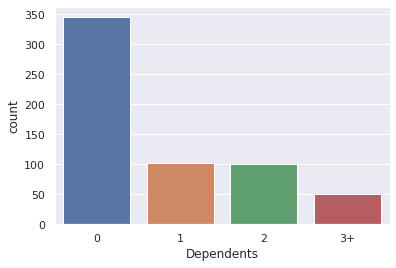

In [ ]:
# Plotting the dependents column against count of each value to see how it is distributed
sns.countplot(x = 'Dependents', data = train)

In [ ]:
# Deciding to fill the dependents null values with mode as well
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

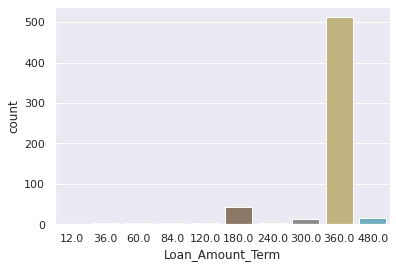

In [ ]:
# Plotting the Loan_Amount_Term against the count of each value to see what the data looks like
sns.countplot(x = 'Loan_Amount_Term', data = train)

*From looking at the plot, it is evident that most of the loans applicaions are submited with a term of 360; therefore I will fill the null valuese in this column with the mode.*

In [ ]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])
train.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

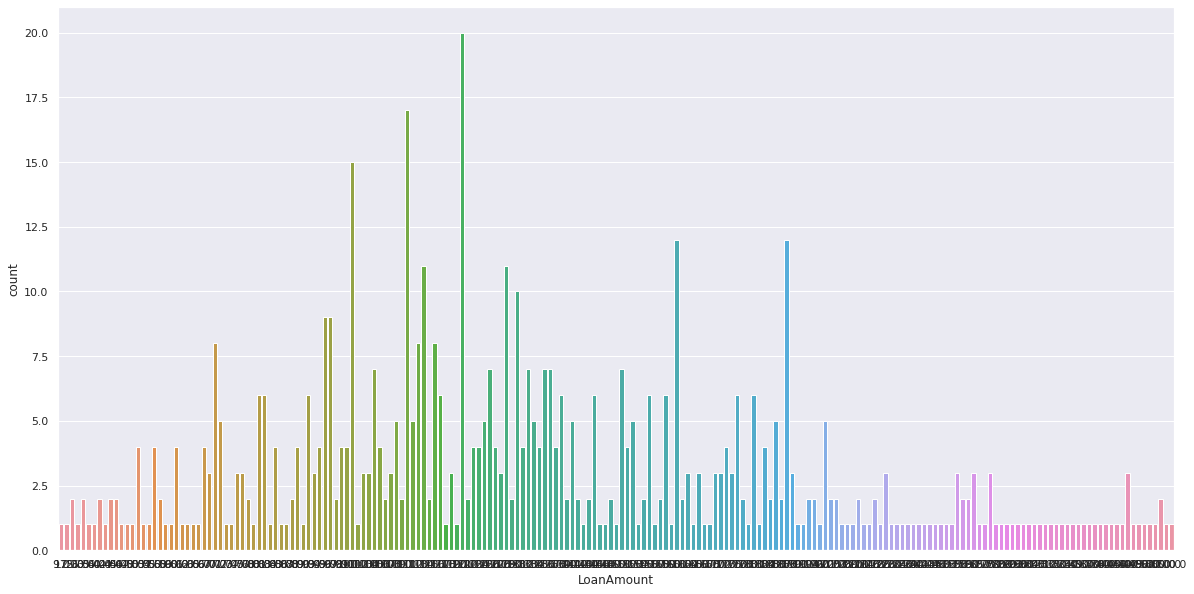

In [ ]:
# Plotting the LoanAmount to see what the data looks like in this column
plt.figure(figsize=(20,10))
sns.countplot(x = 'LoanAmount', data = train)
plt.show()

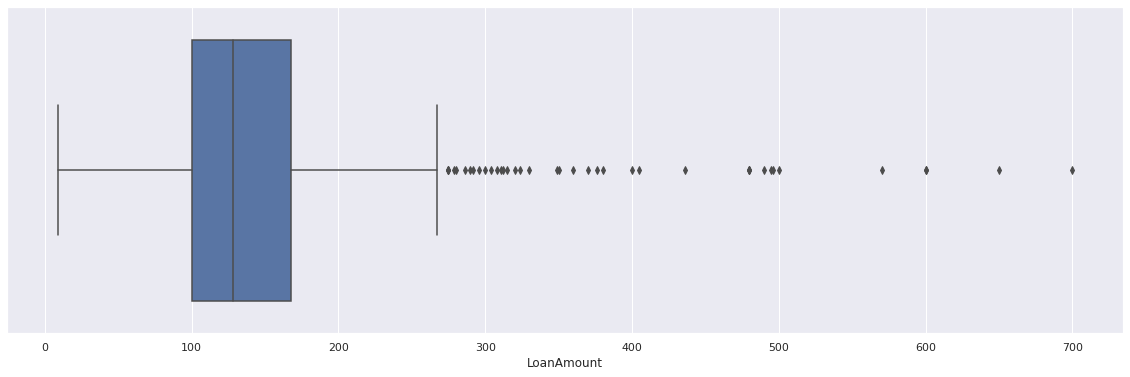

In [ ]:
# Here the data is more spread, so I'm going to plot a box plot to see what the data looks like in terms of outliers and skewness
plt.figure(figsize=(20,6))
sns.boxplot(x = 'LoanAmount', data = train)
plt.show()

*In the case of LoanAmount we will use the median, as it is the middle value of the dataset and isn't affected by outliers. Better than using the mode as the data is more spread.*

In [ ]:
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].median())
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

*Now that I have dealt with the missing values, I want to look at the correlation between the different variables and see if there are any that I can drop*

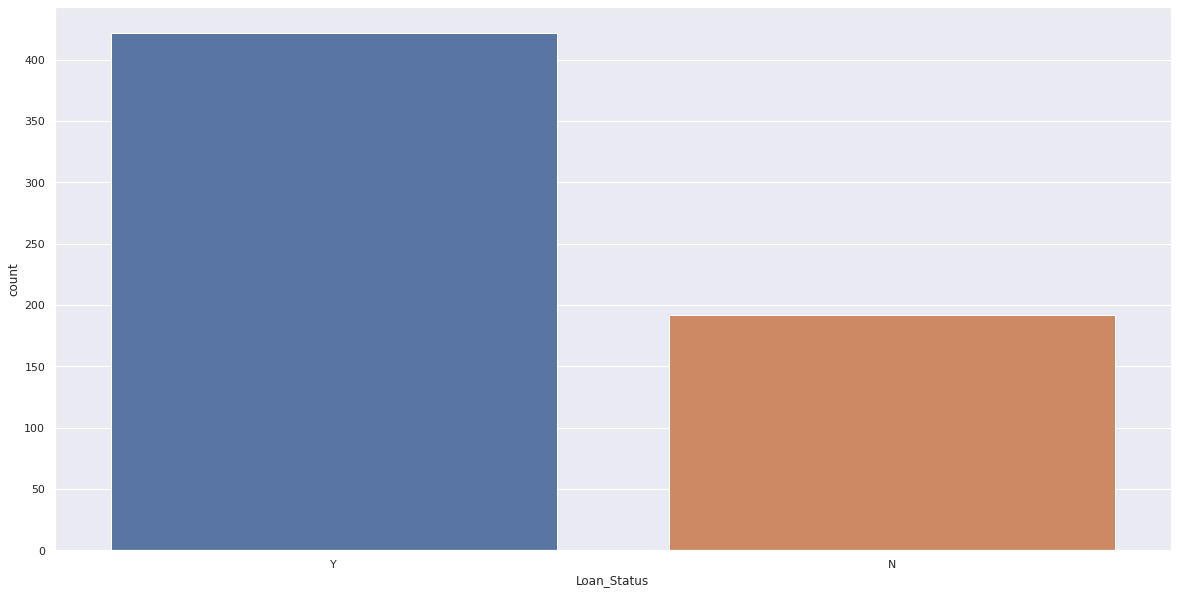

In [ ]:
# Seeing the amount of loans that were accepted vs rejected
plt.figure(figsize=(20,10))
sns.countplot(x = 'Loan_Status', data = train)
plt.show()

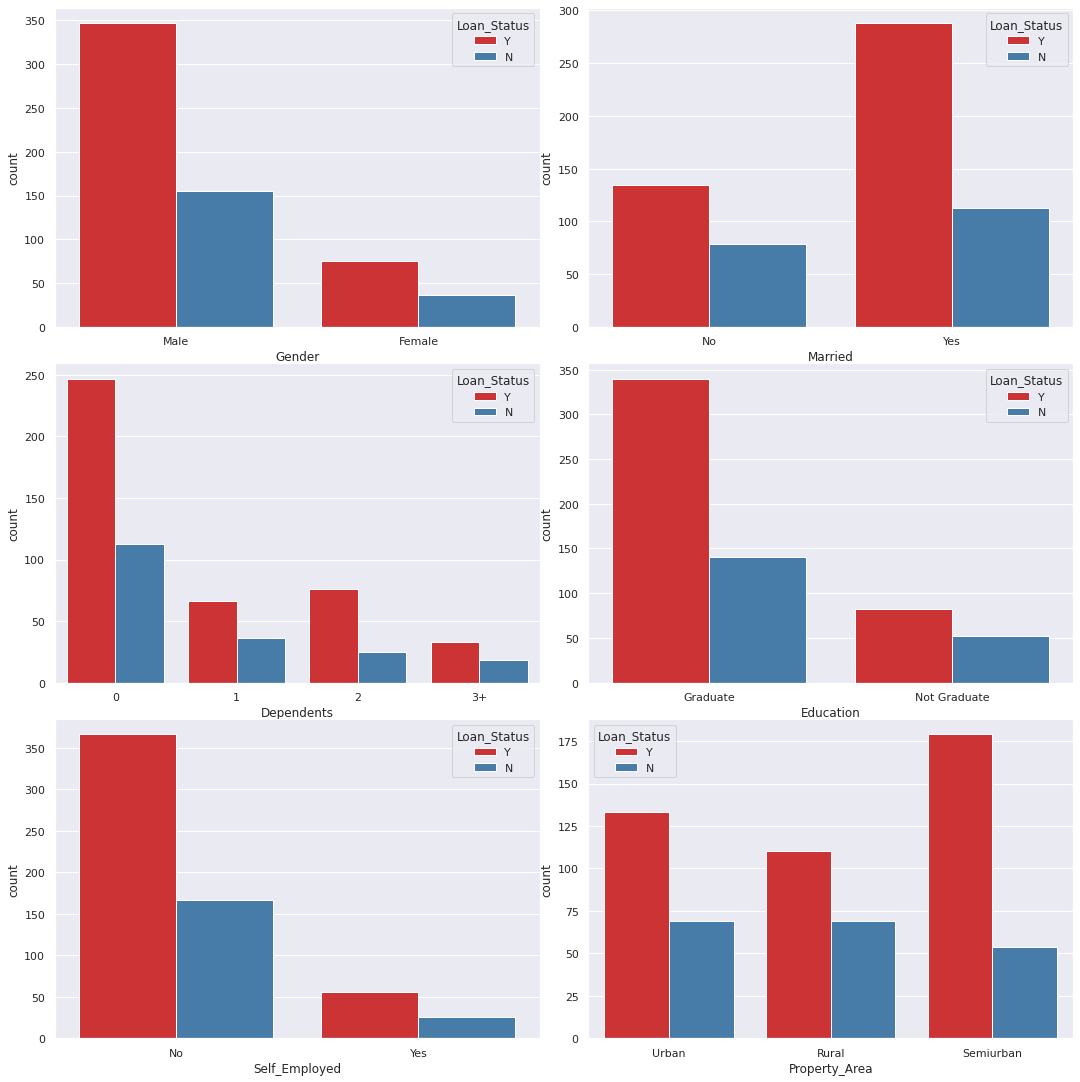

In [ ]:
# Plotting all the categorical columns, to see if loan status is heavily influenced by the variables
fig, axes = plt.subplots(3, 2, figsize=(15,15), sharey=False)
fig.tight_layout()

sns.countplot(ax=axes[0, 0], x=train['Gender'], hue='Loan_Status', data=train, palette='Set1')

sns.countplot(ax=axes[0, 1], x=train['Married'], hue='Loan_Status', data=train, palette='Set1')

sns.countplot(ax=axes[1, 0], x=train['Dependents'], hue='Loan_Status', data=train, palette='Set1')

sns.countplot(ax=axes[1, 1], x=train['Education'], hue='Loan_Status', data=train, palette='Set1')

sns.countplot(ax=axes[2, 0], x=train['Self_Employed'], hue='Loan_Status', data=train, palette='Set1')

sns.countplot(ax=axes[2, 1], x=train['Property_Area'], hue='Loan_Status', data=train, palette='Set1')

*Looking at the plots above we can see which variables influence the loan status most. It can be seen that with Gender, Males are more likely to get a loan over Females. The other variables that are more likely to get a loan are: being married, having no dependents, being a graduate, not being self-employed and the property area.*

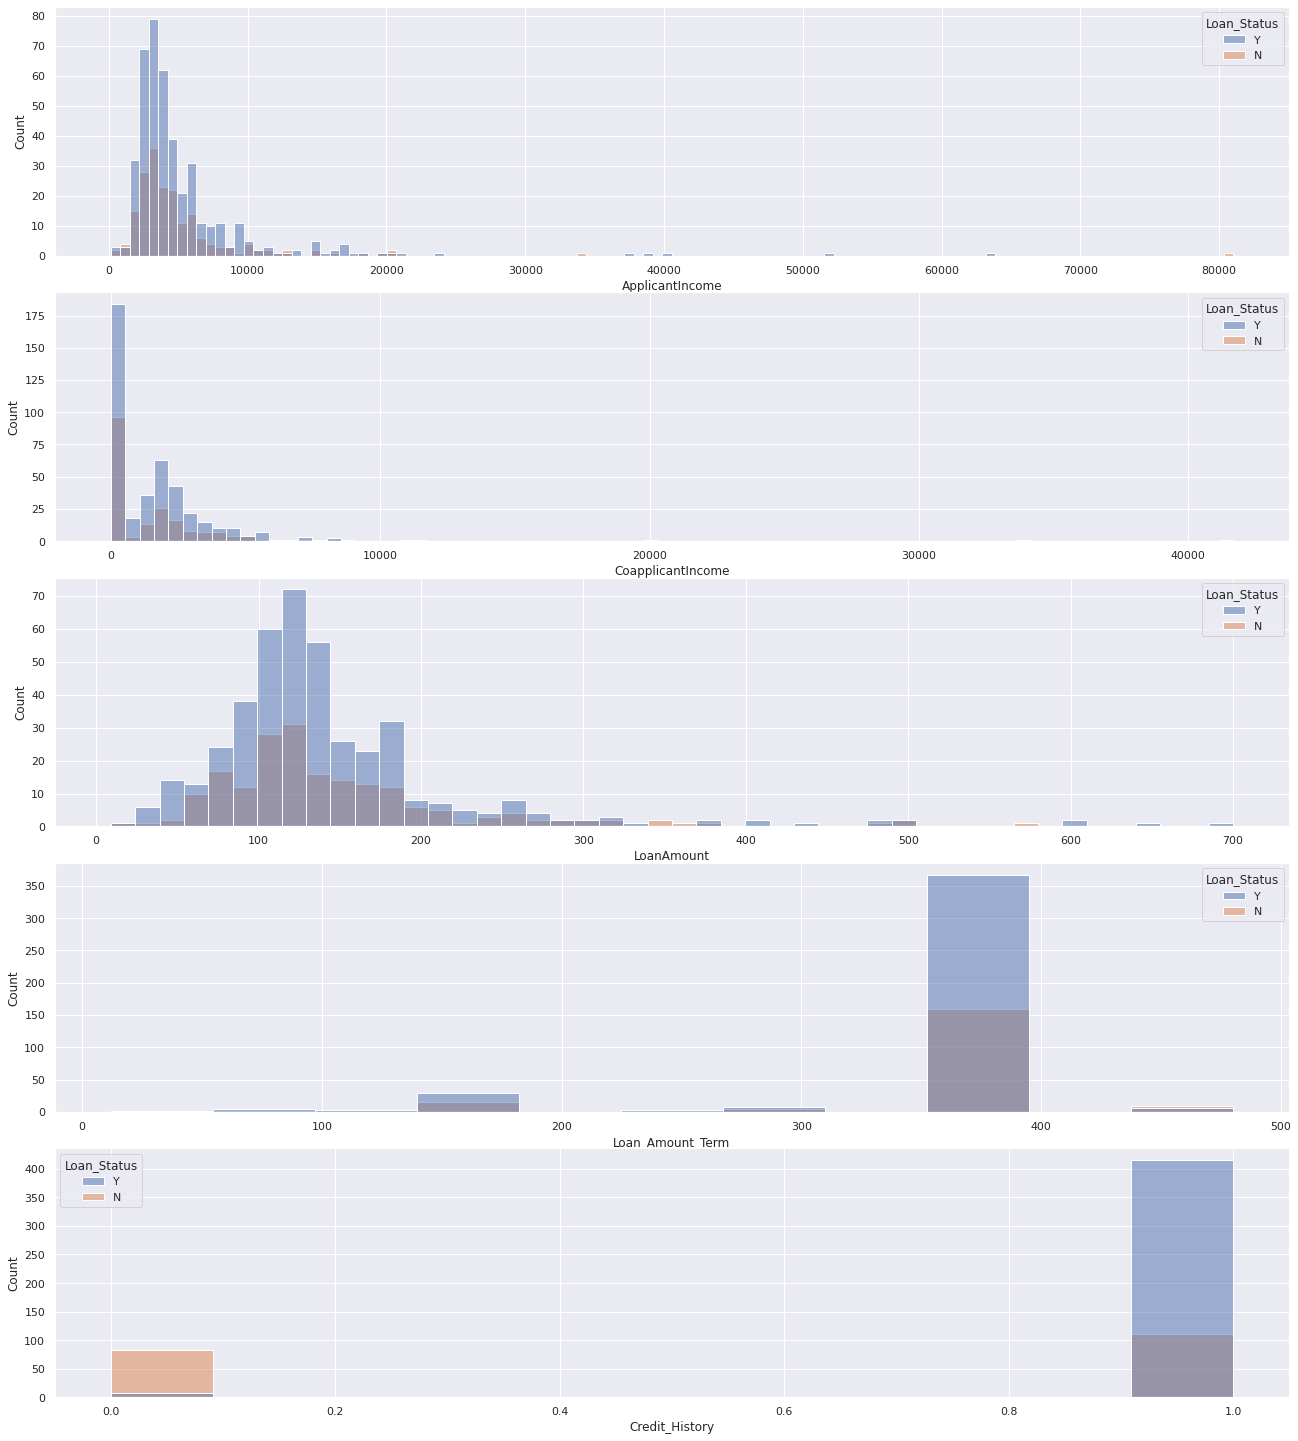

In [ ]:
# Plotting the graphs for the numerical data, again to see the relationship with loan status
fig1, axes = plt.subplots(5, figsize=(18, 20), sharey=False)
fig1.tight_layout()

sns.histplot(ax=axes[0], x=train['ApplicantIncome'], hue='Loan_Status', data=train)

sns.histplot(ax=axes[1], x=train['CoapplicantIncome'], hue='Loan_Status', data=train)

sns.histplot(ax=axes[2], x=train['LoanAmount'], hue='Loan_Status', data=train)

sns.histplot(ax=axes[3], x=train['Loan_Amount_Term'], hue='Loan_Status', data=train)

sns.histplot(ax=axes[4], x=train['Credit_History'], hue='Loan_Status', data=train)

*Looking at the plots of numerical data, we can see that Applicant Income, Coapplicant Income, Loan Amount and Loan Amount Term don't influence the laon status as much as most of the categorical data. However, looking at Credit History, it is noted, that providing a credit history is definitely a contributing factor to the loan status. From these plots it can be determined that Applicant Income, Coapplicant Income, Loan Amount and Loan Amount Term can be dropped from the dataset.*

In [ ]:
# Assigning the new dataset to a new variable, incase I want to see use all the columns for later use
train_clean = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)
train_clean.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


*To be able to work on this data, I need to change the categorical data to numerical values by mapping them.*

In [ ]:
train_clean['Gender'] = train_clean['Gender'].map({'Male': 1, 'Female': 0})
train_clean['Married'] = train_clean['Married'].map({'Yes': 1, 'No': 0})
train_clean['Education'] = train_clean['Education'].map({'Graduate': 1, 'Not Graduate': 0})
train_clean['Self_Employed'] = train_clean['Self_Employed'].map({'Yes': 1, 'No': 0})
train_clean['Property_Area'] = train_clean['Property_Area'].map({'Urban': 0, 'Rural': 1, 'Semiurban': 2})
train_clean['Loan_Status'] = train_clean['Loan_Status'].map({'Y': 1, 'N': 0})
train_clean['Dependents'] = train_clean['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
train_clean.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,1.0,0,1
1,1,1,1,1,0,1.0,1,0
2,1,1,0,1,1,1.0,0,1
3,1,1,0,0,0,1.0,0,1
4,1,0,0,1,0,1.0,0,1


In [ ]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          614 non-null    int64  
 1   Married         614 non-null    int64  
 2   Dependents      614 non-null    int64  
 3   Education       614 non-null    int64  
 4   Self_Employed   614 non-null    int64  
 5   Credit_History  614 non-null    float64
 6   Property_Area   614 non-null    int64  
 7   Loan_Status     614 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 38.5 KB


# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

*Looking at the dataset and looking at the type of data I am looking to predict, I will be using classification models to train and predict the loan status.*

# Part 4: Model Evaluation

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

In [ ]:
#Here we are splitting the data to be able to train and test the model

#y is always listed as the dependant variable so this will be the loan status
y = train_clean['Loan_Status']

#x is always all the independant variables
X = train_clean.drop('Loan_Status', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# Importing ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
# Decision tree model

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_predict = DT.predict(X_test)

print(classification_report(y_test, y_predict))

DT_SC = accuracy_score(y_predict, y_test)
print(f"{round(DT_SC*100, 2)}% Accurate")

              precision    recall  f1-score   support

           0       0.65      0.43      0.52        51
           1       0.81      0.91      0.86       134

    accuracy                           0.78       185
   macro avg       0.73      0.67      0.69       185
weighted avg       0.76      0.78      0.76       185

77.84% Accurate


In [ ]:
# using K-Nearest Neighbors

KN = KNeighborsClassifier()
KN.fit(X_train, y_train)

y_predict = KN.predict(X_test)

print(classification_report(y_test, y_predict))

KN_SC = accuracy_score(y_predict, y_test)
print(f"{round(KN_SC*100, 2)}% Accurate")

              precision    recall  f1-score   support

           0       0.82      0.27      0.41        51
           1       0.78      0.98      0.87       134

    accuracy                           0.78       185
   macro avg       0.80      0.63      0.64       185
weighted avg       0.79      0.78      0.74       185

78.38% Accurate


In [ ]:
# SVC model

SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_predict = SVM.predict(X_test)

print(classification_report(y_test, y_predict))

SVM_SC = accuracy_score(y_predict, y_test)
print(f"{round(SVM_SC*100, 2)}% Accurate")

              precision    recall  f1-score   support

           0       0.91      0.41      0.57        51
           1       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185

82.7% Accurate


*Here I am going to do some hyperparameter tuning to see if I can get better accuracy on the models that I have used.*

In [ ]:
# doing hyperparameter tuning on the decision tree model
from sklearn.model_selection import GridSearchCV

# hyperparameter Optimisation
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 50],
              'min_samples_leaf': [1, 5, 8]
             }

# running the grid search
grid_obj = GridSearchCV(DT, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

#setting clf to the best cset of parameters
dt = grid_obj.best_estimator_

# training the model using the training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_split=3)

In [ ]:
# predicting using test
y_pred = dt.predict(X_test)

# calculating the accuracy of the optimised model
acc_dt = round(accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Decision Tree model : ', acc_dt )

Accuracy of Decision Tree model :  76.22


In [ ]:
# hyperparamter tuning on K-nearest neighbours

parameters = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

grid_obj = GridSearchCV(KN , parameters)
grid_obj = grid_obj.fit(X_train, y_train)

kn = grid_obj.best_estimator_

kn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=10)

In [ ]:
# predicting using test
y_pred = kn.predict(X_test)

# calculating the accuracy of the optimised model
acc_knn = round(accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of K Nearest Neighbour : ', acc_knn )

Accuracy of K Nearest Neighbour :  78.38


In [ ]:
# hyperparamter tuning for SVC

parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

grid_obj = GridSearchCV(SVC(), parameters)
grid_obj = grid_obj.fit(X_train, y_train)

SVM = grid_obj.best_estimator_
SVM.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [ ]:
y_pred = SVM.predict(X_test)

# calculating the accuracy of the optimised model
acc_SVM = round(accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of SVC : ', acc_SVM )

Accuracy of SVC :  82.7


*After optimising the models, we can see that SVC is the best model to use.*

# Part 5: Stretch - Model Deployment

### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

* https://streamlit.io/

Here we're exporting the model we've created into a pkl file to then upload into Azure

In [ ]:
import joblib

joblib.dump(SVM, 'finalModel.pkl', compress=9)

['finalModel.pkl']

In [ ]:
import urllib.request
import json
import os
import ssl

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

# Request data goes here
data = {
}

body = str.encode(json.dumps(data))

url = 'http://5807c035-53fe-453e-aa1a-97455cda3bc3.eastus.azurecontainer.io/score'
api_key = '' # Replace this with the API key for the web service
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print(result)
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(error.read().decode("utf8", 'ignore'))

The request failed with status code: 400
Content-Length: 66
Content-Type: application/json
Date: Thu, 17 Mar 2022 17:38:00 GMT
Server: nginx/1.14.0 (Ubuntu)
X-Ms-Request-Id: 4f27dc61-d11b-46be-b72d-e4867fb3ec71
X-Ms-Run-Fn-Exec-Ms: 0.361
X-Ms-Run-Function-Failed: False
Connection: close


{"status_code": 400, "message": "Missing parameter in body: data"}
